In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum, cos, sin, pi
import sympy as sp
import cmath

In [91]:
delta = 0.02
t = -1
g = 1

a = 1 #lattice constant
# onsite energies
Ea = Eb = delta**2/(2*g)

t1 = t*(1+delta)
t2 = t*(1-delta)

# lattice vectors
a1 = np.array([a, 0])
ssh_lattice = pb.Lattice(a1=a1)
ssh_lattice.add_sublattices(
    ('A', np.array([0]), Ea), ('B', np.array([a/2]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = 1

ssh_lattice.add_hoppings(
    ([0], 'A', 'B', t1),
    ([1], 'B', 'A', t2),
)
ssh_model = pb.Model(
    ssh_lattice,
    pb.translational_symmetry()
)

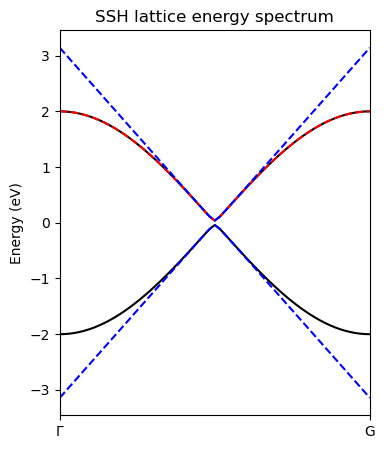

In [93]:
plt.figure(figsize=(4, 5))
solver = pb.solver.lapack(ssh_model)
G1, = ssh_lattice.reciprocal_vectors()

G1 = G1[0]

Gamma = np.array([0])
bands = solver.calc_bands(Gamma, G1)
ssh_energies = bands.energy
ssh_energies_analytic = 2*t*np.sqrt(1+(delta**2-1)*np.sin(np.array(k_path)/2)**2)+delta**2/(2*g)
ssh_energies_dirac = 2*t*np.sqrt(delta**2+(1-delta**2)*(np.array(k_path) - np.pi)**2/4) 

k_path = bands.k_path
plt.plot(ssh_energies, color="black")
plt.plot(ssh_energies_analytic, color="red", linestyle="dashed")
plt.plot(ssh_energies_dirac+delta**2/(2*g), color="blue", linestyle="dashed")
plt.plot(delta**2/(2*g)-ssh_energies_dirac, color="blue", linestyle="dashed")

plt.xticks(k_path.point_indices, [r'$\Gamma$', 'G'])
plt.xlim(0, len(k_path)-1)
#plt.ylim(-1, 1)
#plt.yticks(np.linspace(-4, 4, num=9));
plt.title("SSH lattice energy spectrum");
plt.ylabel("Energy (eV)");

# Finding the ground state energy in the dirac approximation ane exactly

In [184]:
N = 200
Nprime = 2000
t = 1
k_path = np.linspace(0, 2*np.pi, N)
deltas = np.linspace(0, 1, Nprime)
gs_inv = np.linspace(3, 5, 100)
min_energies_dirac = np.array([])
min_energies = np.array([])

for ginv in gs_inv:
    g = 1/ginv
    energies_tot_dirac = np.array([])
    energies_tot_exact = np.array([])
    for delta in deltas:
        ssh_energies = -2*t*np.sqrt(1+(delta**2-1)*np.sin(k_path/2)**2)
        ssh_energies_dirac = -2*t*np.sqrt(delta**2+(1-delta**2)*(k_path - np.pi)**2/4) 
        energies_tot_dirac = np.append(energies_tot_dirac, delta**2/(2*g) + np.sum(ssh_energies_dirac)/N)
        energies_tot_exact = np.append(energies_tot_exact, delta**2/(2*g) + np.sum(ssh_energies)/N)

    min_energies = np.append(min_energies, deltas[np.argmin(energies_tot_exact)])
    min_energies_dirac = np.append(min_energies_dirac, deltas[np.argmin(energies_tot_dirac)])

In [201]:
dirac_poly_coefs = np.polyfit(gs_inv,np.log(min_energies_dirac),1)
exact_poly_coefs = np.polyfit(gs_inv,np.log(min_energies),1)
dirac_poly = np.poly1d(dirac_poly_coefs) 
exact_poly = np.poly1d(exact_poly_coefs) 

In [227]:
exact_poly_coefs[0]/(np.pi/4)

-1.020715003354323

In [228]:
dirac_poly_coefs[0]/(np.pi/4)

-1.0134821277972683

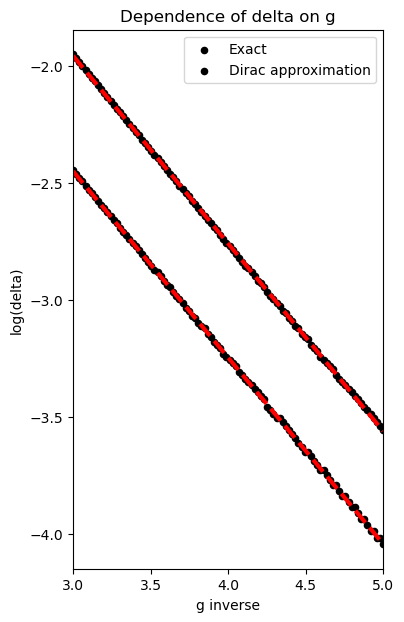

In [233]:
plt.figure(figsize=(4, 7))
plt.plot(gs_inv, dirac_poly(gs_inv), color="red", linewidth=3, linestyle="dashed")
plt.plot(gs_inv, exact_poly(gs_inv), color="red", linewidth=3, linestyle="dashed")

plt.scatter(gs_inv, np.log(min_energies_dirac), color="black", s=20, label="Exact")
plt.scatter(gs_inv, np.log(min_energies), color="black", s=20, label="Dirac approximation")

plt.xlim(3, 5);
plt.title("Dependence of delta on g");
plt.xlabel("g inverse")
plt.ylabel("log(delta)");
plt.legend();